# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string


In [5]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('../data/Phishing_Email.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KMR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Cleaning and Preprocessing

In [6]:
def clean_text(text):
    # Convert to string if not already
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

In [7]:
# Apply cleaning to email text
df['cleaned_text'] = df['Email Text'].apply(clean_text)

# Encode labels
df['label'] = df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)

# Data Anaylsis

Class Distribution:
Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


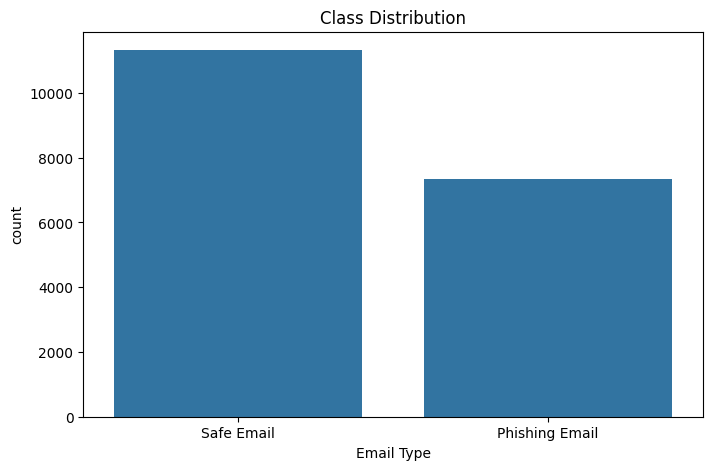

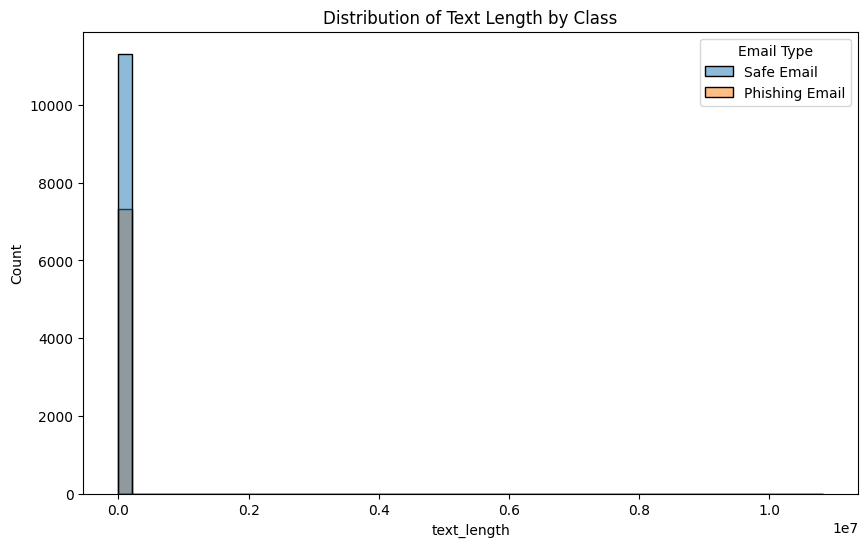

In [8]:
# Exploratory Data Analysis
print("Class Distribution:")
print(df['Email Type'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='Email Type', data=df)
plt.title('Class Distribution')
plt.show()

# Text Length Analysis
df['text_length'] = df['cleaned_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='Email Type', bins=50)
plt.title('Distribution of Text Length by Class')
plt.show()


# Data Preparation for Modeling

In [9]:

# Prepare data for modeling
X = df['cleaned_text']
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ML Models Building and Performance Anaylsis

In [10]:
# Dictionary to store model performance
model_performance = {}

In [11]:
# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_tfidf, y_train)
y_pred = dt.predict(X_test_tfidf)
model_performance['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
}



In [12]:
# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)
model_performance['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
}



In [13]:
# 3. SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred = svm.predict(X_test_tfidf)
model_performance['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
}



In [14]:
# 4. Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)
model_performance['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
}


Decision Tree Performance:
Accuracy: 0.9059
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2264
           1       0.87      0.90      0.88      1466

    accuracy                           0.91      3730
   macro avg       0.90      0.90      0.90      3730
weighted avg       0.91      0.91      0.91      3730



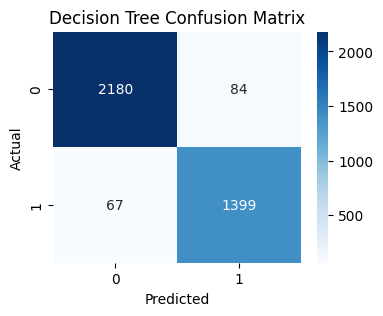


Random Forest Performance:
Accuracy: 0.9571
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2264
           1       0.93      0.96      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.95      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



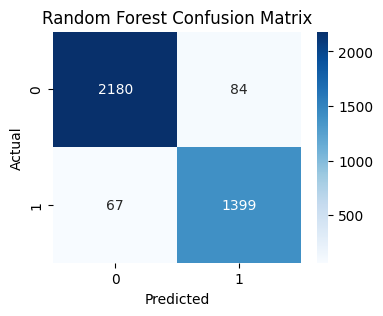


SVM Performance:
Accuracy: 0.9609
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2264
           1       0.94      0.96      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



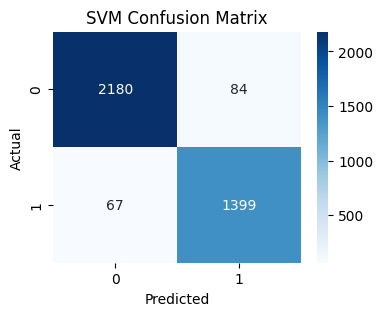


Logistic Regression Performance:
Accuracy: 0.9595
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2264
           1       0.94      0.95      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



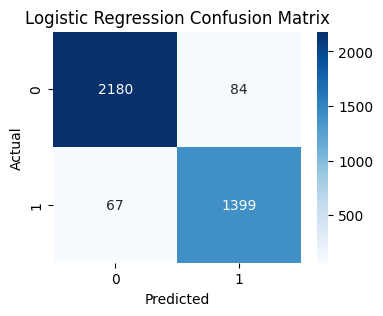

In [15]:
# Print performance metrics
for model, metrics in model_performance.items():
    print(f"\n{model} Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['report'])
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# DL Models Building and Performance Anaylsis

In [16]:
# Tokenization for neural networks
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100  # Fixed length for padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

vocab_size = len(tokenizer.word_index) + 1

In [17]:
# 5. LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 128, input_length=max_len))
lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("\nTraining LSTM Model...")
history = lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, 
                        validation_split=0.1, verbose=1)


Training LSTM Model...
Epoch 1/5


c:\installedPrograms\python\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


420/420 ━━━━━━━━━━━━━━━━━━━━ 90s 205ms/step - accuracy: 0.8379 - loss: 0.3346 - val_accuracy: 0.9611 - val_loss: 0.1074
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 88s 211ms/step - accuracy: 0.9728 - loss: 0.0755 - val_accuracy: 0.9162 - val_loss: 0.1857
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 87s 207ms/step - accuracy: 0.9706 - loss: 0.0708 - val_accuracy: 0.9625 - val_loss: 0.1140
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 88s 208ms/step - accuracy: 0.9817 - loss: 0.0455 - val_accuracy: 0.9605 - val_loss: 0.1364
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 88s 210ms/step - accuracy: 0.9838 - loss: 0.0322 - val_accuracy: 0.9591 - val_loss: 0.1390


In [18]:
# Evaluate LSTM
lstm_score = lstm_model.evaluate(X_test_pad, y_test, verbose=0)
model_performance['LSTM'] = {
    'accuracy': lstm_score[1],
    'report': classification_report(y_test, (lstm_model.predict(X_test_pad) > 0.5).astype(int))
}


117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


In [19]:
# 6. GRU Model
gru_model = Sequential()
gru_model.add(Embedding(vocab_size, 128, input_length=max_len))
gru_model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("\nTraining GRU Model...")
history = gru_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, 
                       validation_split=0.1, verbose=1)



Training GRU Model...
Epoch 1/5


c:\installedPrograms\python\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


420/420 ━━━━━━━━━━━━━━━━━━━━ 92s 209ms/step - accuracy: 0.8187 - loss: 0.3700 - val_accuracy: 0.9357 - val_loss: 0.1406
Epoch 2/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 86s 206ms/step - accuracy: 0.9669 - loss: 0.0915 - val_accuracy: 0.9450 - val_loss: 0.1568
Epoch 3/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 88s 208ms/step - accuracy: 0.9746 - loss: 0.0637 - val_accuracy: 0.9584 - val_loss: 0.1344
Epoch 4/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 91s 216ms/step - accuracy: 0.9742 - loss: 0.0620 - val_accuracy: 0.9618 - val_loss: 0.1146
Epoch 5/5
420/420 ━━━━━━━━━━━━━━━━━━━━ 88s 210ms/step - accuracy: 0.9829 - loss: 0.0404 - val_accuracy: 0.9645 - val_loss: 0.1218


In [20]:
# Evaluate GRU
gru_score = gru_model.evaluate(X_test_pad, y_test, verbose=0)
model_performance['GRU'] = {
    'accuracy': gru_score[1],
    'report': classification_report(y_test, (gru_model.predict(X_test_pad) > 0.5).astype(int))
}

117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step



LSTM Performance:
Accuracy: 0.9536
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2264
           1       0.94      0.94      0.94      1466

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


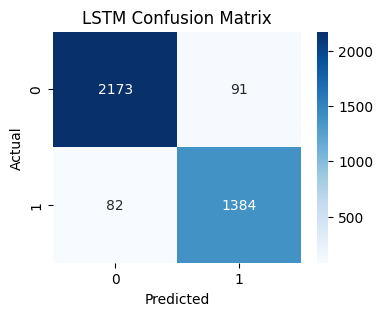


GRU Performance:
Accuracy: 0.9568
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2264
           1       0.93      0.96      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.95      0.96      0.95      3730
weighted avg       0.96      0.96      0.96      3730

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


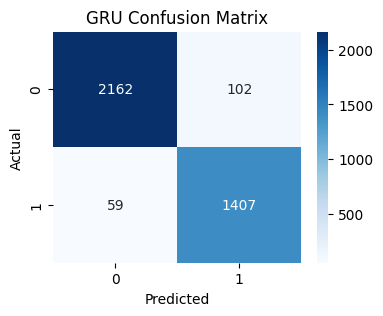

In [21]:

# Print deep learning performance
for model in ['LSTM', 'GRU']:
    print(f"\n{model} Performance:")
    print(f"Accuracy: {model_performance[model]['accuracy']:.4f}")
    print("Classification Report:")
    print(model_performance[model]['report'])
    
    # Confusion Matrix
    y_pred = (lstm_model.predict(X_test_pad) > 0.5).astype(int) if model == 'LSTM' else (gru_model.predict(X_test_pad) > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Comparing Models Metrics

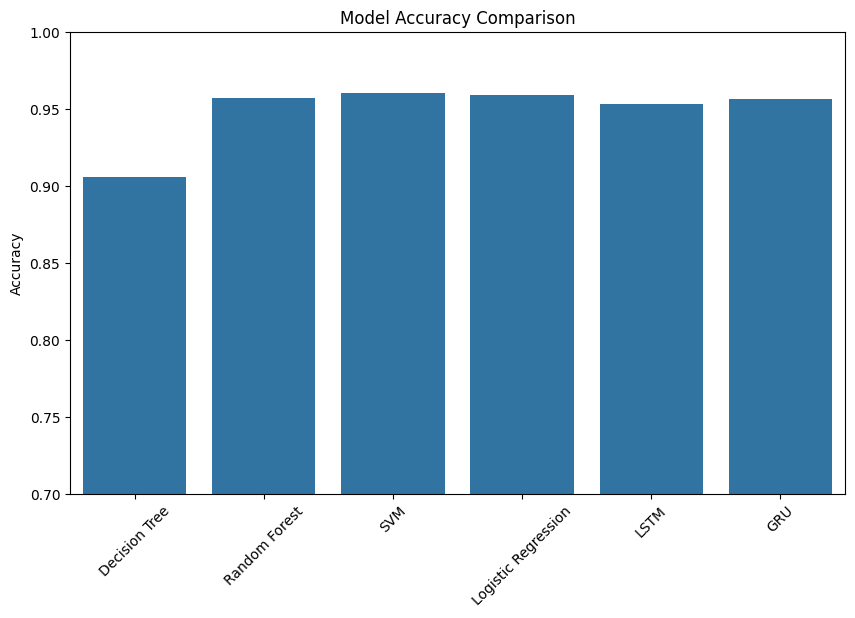


Final Model Comparison:
Decision Tree: Accuracy = 0.9059
Random Forest: Accuracy = 0.9571
SVM: Accuracy = 0.9609
Logistic Regression: Accuracy = 0.9595
LSTM: Accuracy = 0.9536
GRU: Accuracy = 0.9568


In [22]:
# Compare all models
accuracy_comparison = {model: metrics['accuracy'] for model, metrics in model_performance.items()}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_comparison.keys()), y=list(accuracy_comparison.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.show()

print("\nFinal Model Comparison:")
for model, metrics in model_performance.items():
    print(f"{model}: Accuracy = {metrics['accuracy']:.4f}")

# Saving Traditional Machine Learning Models

In [23]:
import pickle
import joblib
from datetime import datetime
import json

# Create a directory to save models if it doesn't exist
import os
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Function to save model with metadata
def save_ml_model(model, model_name, vectorizer=None):
    # Create timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Save the model
    model_filename = f"saved_models/{model_name}_{timestamp}.pkl"
    joblib.dump(model, model_filename)
    
    # Save vectorizer if provided
    if vectorizer:
        vectorizer_filename = f"saved_models/{model_name}_vectorizer_{timestamp}.pkl"
        joblib.dump(vectorizer, vectorizer_filename)
    
    # Save metadata
    metadata = {
        'model_name': model_name,
        'timestamp': timestamp,
        'model_path': model_filename,
        'vectorizer_path': vectorizer_filename if vectorizer else None,
        'model_type': 'traditional_ml'
    }
    
    metadata_filename = f"saved_models/{model_name}_metadata_{timestamp}.json"
    with open(metadata_filename, 'w') as f:
        json.dump(metadata, f)
    
    return metadata

# Save all traditional ML models
ml_models = {
    'decision_tree': dt,
    'random_forest': rf,
    'svm': svm,
    'logistic_regression': lr
}

saved_ml_models = {}
for name, model in ml_models.items():
    saved_ml_models[name] = save_ml_model(model, name, tfidf)

# Saving Deep Learning Models

In [24]:
from tensorflow.keras.models import save_model

def save_dl_model(model, model_name, tokenizer=None):
    # Create timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Save the model
    model_filename = f"saved_models/{model_name}_{timestamp}.h5"
    save_model(model, model_filename)
    
    # Save tokenizer if provided
    if tokenizer:
        tokenizer_filename = f"saved_models/{model_name}_tokenizer_{timestamp}.pkl"
        with open(tokenizer_filename, 'wb') as f:
            pickle.dump(tokenizer, f)
    
    # Save metadata
    metadata = {
        'model_name': model_name,
        'timestamp': timestamp,
        'model_path': model_filename,
        'tokenizer_path': tokenizer_filename if tokenizer else None,
        'model_type': 'deep_learning',
        'max_sequence_length': max_len
    }
    
    metadata_filename = f"saved_models/{model_name}_metadata_{timestamp}.json"
    with open(metadata_filename, 'w') as f:
        json.dump(metadata, f)
    
    return metadata

# Save deep learning models
saved_dl_models = {
    'lstm': save_dl_model(lstm_model, 'lstm', tokenizer),
    'gru': save_dl_model(gru_model, 'gru', tokenizer)
}

# Creating Deployment Package

In [25]:
# Create a deployment package with all necessary components
deployment_package = {
    'ml_models': saved_ml_models,
    'dl_models': saved_dl_models,
    'preprocessing': {
        'text_cleaner': 'clean_text function',
        'requirements': {
            'python_version': '3.8+',
            'packages': [
                'nltk==3.6.2',
                'scikit-learn==0.24.2',
                'tensorflow==2.6.0',
                'pandas==1.3.0',
                'numpy==1.21.0'
            ]
        }
    }
}

# Save the deployment package info
with open('saved_models/deployment_package.json', 'w') as f:
    json.dump(deployment_package, f, indent=4)

print("All models and components saved successfully!")

All models and components saved successfully!
